# Evolution Strategy (μ/μ, λ)-ES for Rastrigin Function Optimization



In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt


## Step 1: Define the Rastrigin Function

Rastrigin function is one of the widely known non-convex functions used as a performance test problem for optimization algorithms. It is very multimodal and has much local minima.

In [2]:
def rastrigin(X):
    """
    Rastrigin function for fitness evaluation.
    Parameters:
        X (np.ndarray): Solution vector or population (N, D)
    Returns:
        np.ndarray: Fitness value(s)
    """
    A = 10
    X = np.atleast_2d(X)  # ensure 2D input
    return A * X.shape[1] + np.sum(X**2 - A * np.cos(2 * np.pi * X), axis=1)


## Step 2: Define ES Parameters and Initialize Population


In [3]:
# Parameters
DIM = 10                  # Dimensions
POP_SIZE = 20             # μ: Number of parents
OFFSPRING_SIZE = 60       # λ: Number of offspring
MUTATION_PROB = 0.1       # Mutation probability per gene
MUTATION_SCALE = 0.3      # Gaussian noise standard deviation
BOUNDS = (-5.12, 5.12)    # Search space bounds
GENERATIONS = 200         # Number of generations

# Population Initialization
def initialize_population(pop_size, dim, bounds):
    return np.random.uniform(bounds[0], bounds[1], (pop_size, dim))

population = initialize_population(POP_SIZE, DIM, BOUNDS)
best_fitness_history = []


## Step 3: Evolutionary Loop



In [5]:
# Step 3: Evolutionary Loop
for generation in range(GENERATIONS):
    offspring = []

    for _ in range(OFFSPRING_SIZE):
        # Select two parents and apply intermediate recombination
        idx = np.random.choice(POP_SIZE, 2, replace=False)
        parent1, parent2 = population[idx]
        child = (parent1 + parent2) / 2.0

        # Mutation: apply Gaussian noise with a probability
        mutation_mask = np.random.rand(DIM) < MUTATION_PROB
        mutation = np.random.normal(0, MUTATION_SCALE, DIM) * mutation_mask
        child += mutation

        # Clip the child within bounds
        child = np.clip(child, BOUNDS[0], BOUNDS[1])
        offspring.append(child)

    # Convert offspring to numpy array
    offspring = np.array(offspring)

    # Evaluate fitness of offspring
    fitness = rastrigin(offspring)

    # Select top μ individuals with the lowest fitness
    best_idx = np.argsort(fitness)[:POP_SIZE]
    population = offspring[best_idx]

    # Track and store best fitness of this generation
    best_fitness = rastrigin(population[0])[0]  # Convert to float
    best_fitness_history.append(best_fitness)

    # Print progress every 20 generations
    if generation % 20 == 0 or generation == GENERATIONS - 1:
        print(f"Generation {generation}: Best Fitness = {best_fitness:.4f}")


Generation 0: Best Fitness = 69.8545
Generation 20: Best Fitness = 11.5042
Generation 40: Best Fitness = 5.6638
Generation 60: Best Fitness = 5.4971
Generation 80: Best Fitness = 5.2201
Generation 100: Best Fitness = 5.1148
Generation 120: Best Fitness = 5.1020
Generation 140: Best Fitness = 5.0283
Generation 160: Best Fitness = 5.0104
Generation 180: Best Fitness = 5.0070
Generation 199: Best Fitness = 4.9944


## Step 4: Convergence Visualization


/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


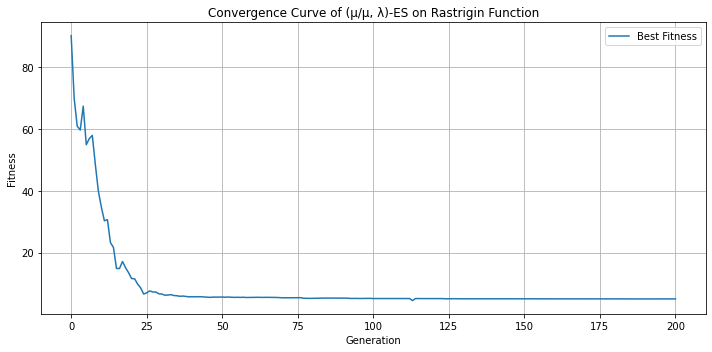

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(best_fitness_history, label='Best Fitness')
plt.title('Convergence Curve of (μ/μ, λ)-ES on Rastrigin Function')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## Step 5: Display Final Results


In [7]:
# Step 5: Final Best Solution and Fitness
best_solution = population[0]
final_fitness = rastrigin(best_solution)[0]  # Ensure scalar output

print("Best Solution Found:")
print(best_solution)
print(f" Fitness of Best Solution: {final_fitness:.6f}")


Best Solution Found:
[ 1.60617749e-04  9.98171045e-01  1.98807254e+00  4.81807897e-03
  2.19075642e-03  7.15674185e-03  5.02969013e-04  1.87318842e-04
  1.16061781e-03 -2.05280468e-03]
 Fitness of Best Solution: 4.994389
